数据降维与线性判别分析
===

# 1.概述
高维数据集有很大风险分布的非常稀疏：大多数训练实例可能彼此远离。当然，这也意味着一个新实例可能远离任何训练实例，这使得预测的可靠性远低于我们处理较低维度数据的预测，因为它们将基于更大的推测。简而言之，训练集的维度越高，过拟合的风险就越大。理论上来说，维数爆炸的一个解决方案是增加训练集的大小从而达到拥有足够密度的训练集。不幸的是，在实践中，达到给定密度所需的训练实例的数量随着维度的数量呈指数增长本部分包含三个内容，线性判别分析-LDA、主成分分析-PCA、奇异值分解-SVD等等，本节我们通过对瑞士卷的降维来学习一下这些方法。维数降低一般有两种主要算法：一种是线性判别分析（LDA），另外一种是主成分分析（PCA）。二者之间的主要区别在于，LDA使用类别信息来查找新特征，以便最大化类别的可分性，而PCA使用每个特征的方差来做到这一点。在这种情况下，LDA可以被认为是有监督算法，而PCA是无监督算法。

Text(0.5,0.92,'Original data')

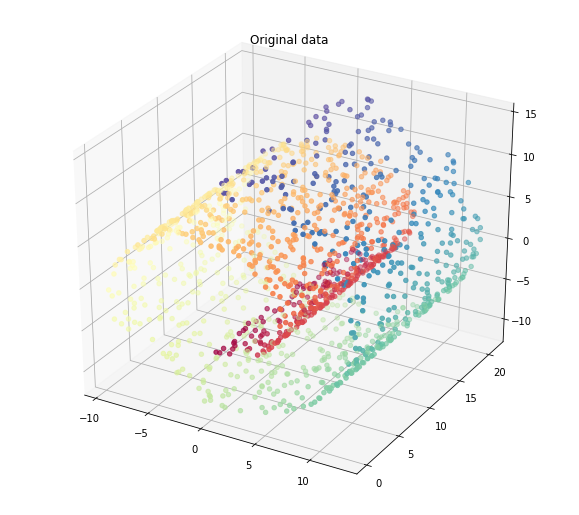

In [2]:
from sklearn import datasets,manifold
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
%matplotlib inline
X, color = datasets.samples_generator.make_swiss_roll(n_samples=1500)
X_r, err = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)
fig = plt.figure(figsize=(10,20))

ax = fig.add_subplot(2,1,1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")

# 2.线性判别分析(LDA,Linear Discriminant Analysis)
## 2.1.LDA的分类思想
LDA是一种有监督的降维技术，也就是说它的数据集的每个样本是有类别输出的。有些资料上也称为是Fisher’s Linear 
Discriminant。LDA的思想可以用一句话概括，就是“投影后类内方差最小，类间方差最大”，也就是说要将数据在低维度上进
行投影，投影后希望每一种类别数据的投影点尽可能的接近，而不同类别的数据的类别中心之间的距离尽可能的大
1. 对于多维空间中的数据处理分类问题较为复杂，LDA算法将多维空间中的数据投影到一条直线上，将d维数据转化为1维
数据进行处理
2. 对于训练数据，设法将多维数据投影到一条直线上，是的同类数据的投影点尽可能接近，异类数据点尽可能远离
3. 在对新数据进行分类时，将其投影到同样的这条直线上，再根据投影点的位置来确定样本的类别

线性判别分析就是将样例投影到一条直线上，使得同类的样例投影点尽可能小，不同类投影点尽可能远离

## 2.2.投影直线的确定
### 2.2.1.问题给出
> 假设我们的数据集$D=\\{(x_1,y_1),(x_2,y_2),...,(x_m,y_m)\\}$，其中任意样本$x_i$为n维向量，$y_i \in \\{0,1\\}$。我们有四个定义如下表

| 公式 | 定义 | 表达式 |
| :--- | :--- | :----- |
| $N_j(j=0,1)$ | 第j类样本的个数 | - |
| $X_j(j=0,1)$ | 第j类样本的集合 | - |
| $\mu_j(j=0,1)$ | 第j类样本的均值向量 | $\frac{1}{N_j}\sum_{x \in X_j}x$, 其中$j=0,1$ |
| $\sum_j(j=0,1)$ | 第j类样本的协方差矩阵(严格说是缺少分母部分的协方差矩阵) | $\sum_{x \in X_j}(x-\mu_j)(x-\mu_j)^T$,其中$j=0,1$ |

### 2.2.2.优化目标
由于有两类数据，因此我们只需要将数据投影到一条直线上即可。假设我们的投影直线是向量$\omega$，则对任意一个样本$x_i$，它
的直线投影为$\omega^Tx_i$，对于我们的两个类别的中心点$\mu_0,\mu_1$,在直线上的投影为$\omega^T\mu_0$和$\omega^T\mu_1$。于LDA需要让不同类别的数据
的类别中心之间的距离尽可能的大，也就是我们要最大化$||\omega^T\mu_0-\omega^T\mu_1||_2^2$,同时我们希望同一类别数据的投影点尽可能的
接近，也就是要同类样本投影点的协方差$\omega^T\sum_0\omega$和$\omega^T\sum_1\omega$尽可能的小，也就是最小化$\omega^T\sum_0\omega + \omega^T\sum_1\omega$，那我们
的优化目标为
$$
argmax_{\omega}J(\omega)=\frac{||\omega^T\mu_0-\omega^T\mu_1||_2^2}{\omega^T\sum_0\omega + \omega^T\sum_1\omega}=\frac{\omega^T(\mu_0-\mu_1)(\mu_0-\mu_1)^T\omega}{\omega^T(\sum_0+\sum_1)\omega}
$$

### 2.2.3.散度矩阵
我们一般定义类内散度矩阵$S_{\omega}$为
$$S_{\omega}=\sum_0+\sum_1=\sum_{x \in X_0}(x-\mu_0)(x-\mu_0)^T + \sum_{x \in X_1}(x-\mu_1)(x-\mu_1)^T$$
同时定义类间散度矩阵$S_b$为
$$S_b=(\mu_0-\mu_1)(\mu_0-\mu_1)^T$$
那我们的优化目标重写为
$$
argmax_{\omega}J(\omega)=\frac{\omega^TS_b\omega}{\omega^TS_{\omega}\omega}
$$

### 2.2.4.瑞利商(Rayleigh quotient)
瑞利商是指这样的函数$R(A,x)=\frac{x^HAx}{x^Hx}$，其中$x$为非零向量，而A为n*n的Hermitan矩阵。所谓Hermitan举着就是满足共轭
转置矩阵和自己相等的矩阵，即$A^H=A$，如果我们的矩阵A是实矩阵，则满足$A^T=A$的矩阵即为Hermitan矩阵。瑞利商
$R(A,x)$有一个非常重要的性质，即它的最大值等于矩阵A最大的特征值，而最小值等于矩阵A的最小特征值，也就是满足
$$
\lambda_{min} \leq \frac{x^HAx}{x^Hx} \leq \lambda_{max}
$$
当向量x是标准正交基时，即满足$x^Hx=1$时，瑞利商退化为$R(A,x)=x^HAx$，这个形式在谱聚类和PCA中都有出现

### 2.2.5.广义瑞利商(Generalized Rayleigh quotient)
广义瑞利商是指这样的函数$R(A,B,x)=\frac{x^HAx}{x^HBx}$,其中x为非零向量，而A,B为n×n的Hermitan矩阵,B为正定矩阵。只要通过
将其通过标准化就可以转化为瑞利商的格式，我们就能求解。我们令$x′=B^{-\frac{1}{2}}x$,则分母转化为
$$
x^HBx=x'^H(B^{-\frac{1}{2}})^HBB^{-\frac{1}{2}}x'=x'^HB^{-\frac{1}{2}}BB^{-\frac{1}{2}}x'=x'^Hx'
$$
分子转化为
$$
x^HAx=x'^HB^{-\frac{1}{2}}AB^{-\frac{1}{2}}x'
$$
此时我们的$R(A,B,x)$转化为$R(A,B,x')$
$$R(A,B,x')=\frac{x'^HB^{-\frac{1}{2}}AB^{-\frac{1}{2}}x'}{x'^Hx'}$$
利用前面的瑞利商的性质，我们可以很快的知道，$R(A,B,x)$的最大值为矩阵$B^{-\frac{1}{2}}AB^{-\frac{1}{2}}$的最大特征值，或者说矩阵
$B^{-1}A$的最大特征值，而最小值为$B^{-1}A$的最小特征值

### 2.2.6.二类LDA问题求解
我们看到最后的目标函数，一看就知道是广义瑞利商，那么$J(\omega)$的最大值就是$S_{\omega}^{-1}S_b$的最大特征值，而对应的$\omega$为$S_{\omega}^{-1}S_b$
的最大特征值对应的特征向量。注意到对于二类的时候，$S_b\omega$的方向恒为$\mu_0-\mu_1$，不妨令$S_b\omega=\lambda(\mu_0-\mu_1)$，将其带入
$(S_{\omega}^{-1}S_b)\omega=\lambda\omega$，可以得到$\omega=S_{\omega}^{-1}(\mu_0-\mu_1)$，也就是说我们只要求出原始而类样本的均值和方差就可以确定最佳的投
影方向$\omega$了

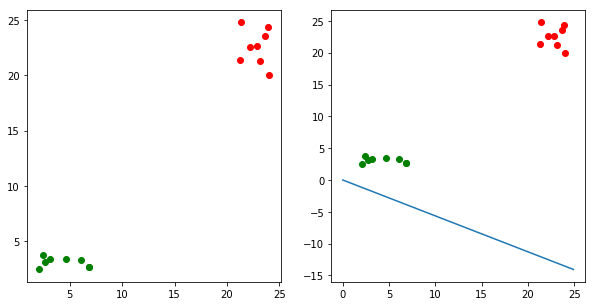

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import mat
%matplotlib inline

group1 = np.random.random((8,2))*5+20
group2 = np.random.random((8,2))*5+2
X1 = group1
y1 = np.ones((8,1))
X0 = group2
y0 = np.zeros((8,1))
plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(121)
plt.scatter(X1[:,0],X1[:,1],c='r')
plt.scatter(X0[:,0],X0[:,1],c='g')

mean1=np.array([np.mean(X1[:,0]),np.mean(X1[:,1])])
mean0=np.array([np.mean(X0[:,0]),np.mean(X0[:,1])])

m1=np.shape(X1)[0]
sw=np.zeros(shape=(2,2))
for i in range(m1):
    xsmean=mat(X1[i,:]-mean1)
    sw+=xsmean.transpose()*xsmean
m0=np.shape(X0)[0]
for i in range(m0):
    xsmean=mat(X0[i,:]-mean0)
    sw+=xsmean.transpose()*xsmean
w=(mean0-mean1)*(mat(sw).I)

plt.subplot(122)
plt.scatter(X1[:,0],X1[:,1],c='r')
plt.scatter(X0[:,0],X0[:,1],c='g')
x=np.arange(0,25,0.1)
y=np.array((-w[0,0]*x)/w[0,1])
plt.plot(x,y)